# Transcript from Lecture, November 4, 2021

In [1]:
import sys

########################################
# Change the string in the line below! #
########################################
sys.path.append("/Users/gilbert/Documents/CS111-2021-fall/Python") 

import os
import time
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import linalg as spla
import scipy.sparse
import scipy.sparse.linalg
from scipy import integrate
import networkx as nx
import json
import cs111

##########################################################
# If this import for matplotlib doesn't work, try saying #
#   conda install -c conda-forge ipympl                  #
# at a shell prompt on your computer                     #
##########################################################
import matplotlib
%matplotlib ipympl

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d




np.set_printoptions(precision = 4)

# Data fitting by least squares

## The surveyor problem

In [ ]:
A = np.array([[1,0,0],[0,1,0],[0,0,1],[-1,1,0],[-1,0,1],[0,-1,1]])
b = np.array([1237,1941,2417,711,1177,475])
print('A:'); print(A)
print('\nb:', b)

In [ ]:
x = npla.solve(A,b)

In [ ]:
x, resid, rank, sv = npla.lstsq(A, b, rcond = None)
x

In [ ]:
npla.lstsq?


In [ ]:
x = npla.lstsq(A, b, rcond = None)[0]
x

In [ ]:
b - A@x

In [ ]:
relres = npla.norm(b - A@x)/npla.norm(b)
print('relres =', relres)

In [ ]:
first_surveyor_x = np.array([1237,1941,2417])
relres = npla.norm(b - A @ first_surveyor_x)/npla.norm(b)
print("first surveyor's relres =", relres)

## Fitting a linear-regression line to data

<b>Warning: This data originated from a real source (SDSS), but it has been messed around with and should be thought of as only a toy example.

In [2]:
u = np.array([
24.41442,
25.67274,
26.02992,
23.00638,
24.86972,
21.96248,
21.87139,
24.93143,
22.90206,
22.749,
23.84269,
21.74025,
23.87719,
19.22808,
21.62093,
25.31738,
24.78468,
26.16757,
24.25187,
23.59213,
22.67077,
25.01685,
25.43069,
24.23741,
22.36275,
24.56208,
21.57241,
28.41815,
25.05081,
20.96467,
23.56018,
23.45984,
22.8903,
22.97415,
20.78101,
22.46072,
24.60077,
24.78432,
23.35197,
24.09856,
25.7874,
22.36821,
24.50825,
22.06679,
16.63657,
24.38522,
26.19138,
21.29271])

z = np.array([
21.37779,
21.2569,
19.88106,
20.76563,
23.18144,
19.76097,
18.34194,
21.97318,
18.26459,
20.63926,
21.69268,
18.20393,
20.19502,
15.4874,
21.864,
22.357,
22.36432,
20.08167,
20.08758,
20.00934,
19.9816,
21.85483,
19.38139,
17.90937,
16.79848,
22.54093,
18.07866,
27.90404,
21.32371,
17.1744,
18.08388,
22.01883,
19.4599,
22.5115,
16.82848,
21.34581,
20.29847,
22.91343,
19.40759,
21.99136,
22.56684,
19.13174,
22.60053,
20.24307,
13.87426,
19.74682,
21.74273,
17.74383])/100

In [3]:
u.shape

(48,)

In [4]:
z.shape

(48,)

Text(0.5, 1.0, 'Hubble diagram: magnitude and red shift of astronomical objects')

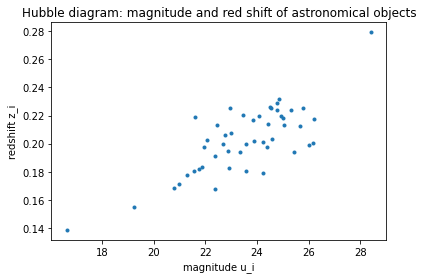

In [5]:
%matplotlib inline
plt.figure()
plt.plot(u,z,'.')
plt.xlabel('magnitude u_i')
plt.ylabel('redshift z_i')
plt.title('Hubble diagram: magnitude and red shift of astronomical objects')

In [6]:
m = len(u)
A = np.ones((m,2))
A[:,1] = u
A.shape

(48, 2)

In [7]:
A

array([[ 1.    , 24.4144],
       [ 1.    , 25.6727],
       [ 1.    , 26.0299],
       [ 1.    , 23.0064],
       [ 1.    , 24.8697],
       [ 1.    , 21.9625],
       [ 1.    , 21.8714],
       [ 1.    , 24.9314],
       [ 1.    , 22.9021],
       [ 1.    , 22.749 ],
       [ 1.    , 23.8427],
       [ 1.    , 21.7402],
       [ 1.    , 23.8772],
       [ 1.    , 19.2281],
       [ 1.    , 21.6209],
       [ 1.    , 25.3174],
       [ 1.    , 24.7847],
       [ 1.    , 26.1676],
       [ 1.    , 24.2519],
       [ 1.    , 23.5921],
       [ 1.    , 22.6708],
       [ 1.    , 25.0169],
       [ 1.    , 25.4307],
       [ 1.    , 24.2374],
       [ 1.    , 22.3627],
       [ 1.    , 24.5621],
       [ 1.    , 21.5724],
       [ 1.    , 28.4182],
       [ 1.    , 25.0508],
       [ 1.    , 20.9647],
       [ 1.    , 23.5602],
       [ 1.    , 23.4598],
       [ 1.    , 22.8903],
       [ 1.    , 22.9742],
       [ 1.    , 20.781 ],
       [ 1.    , 22.4607],
       [ 1.    , 24.6008],
 

In [8]:
x = npla.lstsq(A, z, rcond = None)[0]
x

array([-0.0113,  0.0091])

In [9]:
np.linspace(15,30,num=4)

array([15., 20., 25., 30.])

Text(0.5, 1.0, 'Hubble diagram: magnitude and red shift of astronomical objects')

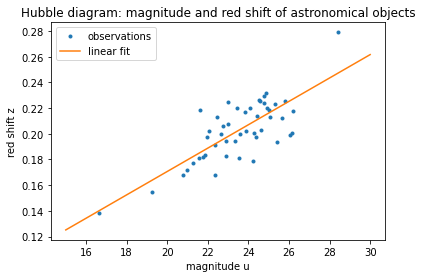

In [10]:
%matplotlib inline
plt.figure()
plt.plot(u,z,'.')
lineu = np.linspace(15,30,num=4)
linez = x[0] + x[1]*lineu
plt.plot(lineu,linez)
plt.xlabel('magnitude u')
plt.ylabel('red shift z')
plt.legend(('observations', 'linear fit'))
plt.title('Hubble diagram: magnitude and red shift of astronomical objects')

In [ ]:
x

## SVD and least squares

In [11]:
# The surveyors again

A = np.array([[1,0,0],[0,1,0],[0,0,1],[-1,1,0],[-1,0,1],[0,-1,1]])
b = np.array([1237,1941,2417,711,1177,475])
print('A:'); print(A)
print()
print('b:', b)

A:
[[ 1  0  0]
 [ 0  1  0]
 [ 0  0  1]
 [-1  1  0]
 [-1  0  1]
 [ 0 -1  1]]

b: [1237 1941 2417  711 1177  475]


In [12]:
U,sigma,Vt = npla.svd(A)

print('singular values:', sigma)
print()

S = np.zeros(A.shape)
for i, s in enumerate(sigma):
    S[i,i] = s
    
V = Vt.T

print('U:'); print(U)
print()
print('S:'); print(S)
print()
print('V:'); print(V)

singular values: [2. 2. 1.]

U:
[[-1.4551e-16 -4.0825e-01  5.7735e-01  5.1134e-01  4.8783e-01 -2.3508e-02]
 [ 3.5355e-01  2.0412e-01  5.7735e-01 -4.8783e-01  2.3508e-02  5.1134e-01]
 [-3.5355e-01  2.0412e-01  5.7735e-01 -2.3508e-02 -5.1134e-01 -4.8783e-01]
 [ 3.5355e-01  6.1237e-01 -5.8001e-17  6.6639e-01 -1.7856e-01  1.5505e-01]
 [-3.5355e-01  6.1237e-01 -6.3767e-17 -1.5505e-01  6.6639e-01 -1.7856e-01]
 [-7.0711e-01 -2.9055e-17 -6.3767e-17  1.7856e-01 -1.5505e-01  6.6639e-01]]

S:
[[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

V:
[[-0.     -0.8165  0.5774]
 [ 0.7071  0.4082  0.5774]
 [-0.7071  0.4082  0.5774]]


In [13]:
print('A:'); print(A)
print()
print('U @ S @ V.T:'); print(U @ S @ V.T)


A:
[[ 1  0  0]
 [ 0  1  0]
 [ 0  0  1]
 [-1  1  0]
 [-1  0  1]
 [ 0 -1  1]]

U @ S @ V.T:
[[ 1.0000e+00 -2.2499e-16  2.1910e-16]
 [ 1.0808e-16  1.0000e+00  5.5217e-16]
 [ 9.0901e-17 -2.4217e-16  1.0000e+00]
 [-1.0000e+00  1.0000e+00  1.3305e-16]
 [-1.0000e+00 -3.6816e-17  1.0000e+00]
 [ 1.0631e-17 -1.0000e+00  1.0000e+00]]


In [14]:
npla.norm(A - U@S@V.T)

1.1466394180170253e-15

The least squares problem is to find the $x$ that minimizes the 2-norm $||Ax-b||_2$. We can use SVD to solve this, because multiplication by an orthogonal matrix doesn't change the 2-norm of a vector.

We want to minimize 

$$||Ax-b|| = ||USV^Tx-b||.$$

Multiplying by the orthogonal matrix $U^T$, this is the same as minimizing 

$$||U^TUSV^Tx - U^Tb|| = ||SV^Tx-U^Tb||.$$

Define $y=V^Tx$. Then if we can somehow find the $y$ that minimizes

$$||Sy - U^Tb||,$$

we can compute $x = Vy$ and we'll be done.

In [15]:
print('b:', b)
print('U.T @ b:', U.T@b)

b: [1237 1941 2417  711 1177  475]
U.T @ b: [-6.6892e+02  1.5407e+03  3.2303e+03  4.9513e+00 -3.0940e+00  9.5464e-01]


In [16]:
print('S:'); print(S)
print()
print('sigma:', sigma)

S:
[[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

sigma: [2. 2. 1.]


The bottom part of $S$ is zero. Therefore the bottom part of $Sy$ will be zero no matter what $y$ is, and the best we can do to minimize $||Sy - U^Tb||$ is to make the top part of $Sy$ match the top part of $U^Tb$.

That's easy because the top part of $S$ is diagonal.

In [17]:
print('first 3 elements of U.T @ b:', (U.T @ b)[:3])

first 3 elements of U.T @ b: [-668.923  1540.729  3230.2748]


In [18]:
y = (U.T @ b)[:3] / sigma

print('y:', y)

y: [-334.4615  770.3645 3230.2748]


In [19]:
x = V@y

print('x:', x)

x: [1236. 1943. 2416.]


In [20]:
print('npla.lstsq x:', npla.lstsq(A, b, rcond=None)[0])

npla.lstsq x: [1236. 1943. 2416.]


In [21]:
npla.norm(A@x - b)

5.916079783099616

In [22]:
npla.norm(S@y - U.T@b)

5.916079783099692

In [23]:
print('S@y:', S@y)
print()
print('U.T@b:', U.T@b)
print()
print('S@y - U.T@b:', S@y - U.T@b)

S@y: [-668.923  1540.729  3230.2748    0.        0.        0.    ]

U.T@b: [-6.6892e+02  1.5407e+03  3.2303e+03  4.9513e+00 -3.0940e+00  9.5464e-01]

S@y - U.T@b: [ 0.      0.      0.     -4.9513  3.094  -0.9546]


In [24]:
npla.norm((U.T@b)[3:])

5.916079783099692

In [25]:
npla.lstsq?

# Eigenvalues and eigenvectors

If $w$ is a nonzero vector and $\lambda$ is a number and $Aw = \lambda w$, we say $w$ is an *eigenvector* of $A$ with *eigenvalue* $\lambda$. Notice that in this case any nonzero multiple of $w$ is also an eigenvector.

Every matrix has at least one eigenvalue/eigenvector, and an $n$-by-$n$ matrix has at most $n$ linearly independent eigenvectors.

In [26]:
spla.eig?

In [27]:
A = np.eye(3)
A

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [28]:
lam, W = spla.eig(A)
print('lam:', lam)
print('W:')
print(W)

lam: [1.+0.j 1.+0.j 1.+0.j]
W:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [29]:
A = np.diag([1,2,3])
A

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [30]:
lam, W = spla.eig(A)
print('lam:', lam)
print('W:')
print(W)

lam: [1.+0.j 2.+0.j 3.+0.j]
W:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [31]:
# An eigenvalue can be zero (but an eigenvector can't be the zero vector)
A[1,1] = 0
A

array([[1, 0, 0],
       [0, 0, 0],
       [0, 0, 3]])

In [32]:
# An eigenvalue can be zero (but an eigenvector can't be the zero vector)
lam, W = spla.eig(A)
print('lam:', lam)
print('W:')
print(W)

lam: [1.+0.j 0.+0.j 3.+0.j]
W:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [33]:
A = np.array([[0,1,0,0], [0,0,1,0], [0,0,0,1], [1,0,0,0]])
A

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0]])

In [34]:
lam, W = spla.eig(A)
print('lam:', lam)
print('W:')
print(W)

lam: [-1.0000e+00+0.j  8.3267e-17+1.j  8.3267e-17-1.j  1.0000e+00+0.j]
W:
[[-5.0000e-01+0.0000e+00j  1.9926e-17-5.0000e-01j  1.9926e-17+5.0000e-01j
  -5.0000e-01+0.0000e+00j]
 [ 5.0000e-01+0.0000e+00j  5.0000e-01+0.0000e+00j  5.0000e-01-0.0000e+00j
  -5.0000e-01+0.0000e+00j]
 [-5.0000e-01+0.0000e+00j -2.1421e-16+5.0000e-01j -2.1421e-16-5.0000e-01j
  -5.0000e-01+0.0000e+00j]
 [ 5.0000e-01+0.0000e+00j -5.0000e-01+1.2665e-16j -5.0000e-01-1.2665e-16j
  -5.0000e-01+0.0000e+00j]]


In [35]:
A = np.random.rand(4,4)
A

array([[0.3582, 0.3117, 0.8357, 0.6985],
       [0.2933, 0.6358, 0.8445, 0.7384],
       [0.4422, 0.9567, 0.44  , 0.0894],
       [0.0451, 0.723 , 0.8633, 0.8652]])

In [36]:
lam, W = spla.eig(A)
print('lam:', lam)
print('W:')
print(W)

lam: [ 2.2855+0.j      0.246 +0.j     -0.1161+0.0817j -0.1161-0.0817j]
W:
[[ 0.4706+0.j      0.1948+0.j      0.451 -0.0104j  0.451 +0.0104j]
 [ 0.5459+0.j     -0.1516+0.j      0.1661-0.0652j  0.1661+0.0652j]
 [ 0.4224+0.j      0.6392+0.j     -0.7222+0.j     -0.7222-0.j    ]
 [ 0.5496+0.j     -0.7284+0.j      0.4849+0.0889j  0.4849-0.0889j]]
